# Welcome to Week 2
Last week you played with data and built models in a very practical way. This week, you will go deeper into theory and spend time on some foundational concepts.  This notebook is divided into two sections:

1. The Theory: an introduction to bias and variance - two key concepts in machine learning - and how they affect model performance
2. The Practice: a chance for you to experiment with how we deal with these concepts in practice

**You may finish the coding questions fairly quickly, but we expect you to spend most of your time teaching yourself the theoretical concepts** that come up in this notebook. We will use the 2-on-1 review session to test you on these concepts. Consequently, you should spend your time going through the below **resources** and playing with these concepts beyond this notebook.
### Resources (spend your time here!)
- [Caltech Learn from data](http://work.caltech.edu/telecourse.html ""): Seminal online course that introduces the theory of machine learning
- [Introduction to Statistical Learning](https://www-bcf.usc.edu/~gareth/ISL/ ""): Landmark textbook (and videos) on machine learning theory
- *Machine Learning* by Tom M. Mitchell: See chapters 5.2 & 5.3 (textbook available on our bookshelf)
- [Datacamp Supervised learning with scikit-learn](https://www.datacamp.com/courses/supervised-learning-with-scikit-learn ""): Practical walkthrough of some key concepts and their application
- [Understanding the Bias Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html ""): Blog post on the topic of bias and variance
- [Kaggle Ensembling Guide](https://mlwave.com/kaggle-ensembling-guide/ ""): Ensembling guide
- [XGBoost tutorials](https://xgboost.readthedocs.io/en/latest/tutorials/model.html ""): XGBoost guide

### Collaboration Policy

Collaboration is the best way to learn. Try everything yourself first, then discuss your method with your teammates. Do not directly copy their code, unless you are trying to learn a programming technique. Do your own thinking and write your own code.

If you believe referring to someone's answer is the best way to learn, we recommend looking at the code, then walking away for a few minutes, and come back to write your own version of the code. There will be minimum policing, but we will check for direct copying of code.

Please list your collaborators:

### Imports
This section should be reserved for packages/libraries you that you would normally use (you can add models/functions/libraries as you go along)

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as st
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
import math
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb

### Dataset
Begin by loading the Boston House Prices dataset, or simply the Boston dataset, for our exploration. <br>
You can find it on Kaggle, or simply import it from the scikit-learn build-in datasets.

In [2]:
column_labels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_raw = pd.read_csv('data/housing.csv', delim_whitespace=True, names=column_labels)
print(housing_raw.shape)

(506, 14)


In [3]:
housing_raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
housing_raw.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
housing_raw.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


# The Theoretical Side

In the first week, you learned about how to use some supervised learning algorithms. In this second week, we will go slightly deeper, to appreciate why machine learning works. We still stay in the realm of supervised learning, but many of the concepts learned here are applicable to general machine learning.

# 1. Model Complexity

We want to demonstrate the impact of implementing complicated models. <br> __Explore the dataset and choose one variable that you think can be most predictive of the target variable (price) in the Boston dataset.__ <br> (Please provide justification to the variable you chose in writing).

### CRIM (per capita crime rate by town)

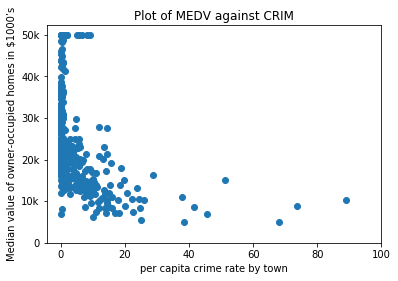

In [7]:
plt.clf()   # Clear figure
plt.scatter(housing_raw['CRIM'], housing_raw['MEDV'])
plt.xlabel("per capita crime rate by town")
plt.ylabel("Median value of owner-occupied homes in $1000’s")
plt.title('Plot of MEDV against CRIM')

# Definition of tick_val and tick_lab
xtick_val = [0,20,40,60,80,100]
ytick_val = [0,10,20,30,40,50]
ytick_lab = ['0','10k','20k','30k','40k','50k']

# Adapt the ticks on the axis
plt.xticks(xtick_val)
plt.yticks(ytick_val, ytick_lab)

plt.show()

### ZN (proportion of residential land zoned for lots over 25,000 sq.ft.)

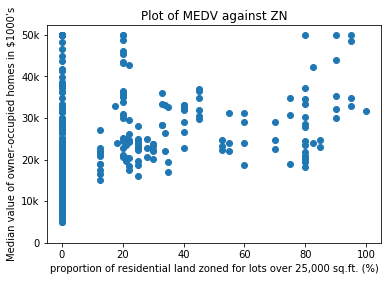

In [8]:
plt.clf()   # Clear figure
plt.scatter(housing_raw['ZN'], housing_raw['MEDV'])
plt.xlabel("proportion of residential land zoned for lots over 25,000 sq.ft. (%)")
plt.ylabel("Median value of owner-occupied homes in $1000’s")
plt.title('Plot of MEDV against ZN')

# Definition of tick_val and tick_lab
xtick_val = [0,20,40,60,80,100]
ytick_val = [0,10,20,30,40,50]
ytick_lab = ['0','10k','20k','30k','40k','50k']

# Adapt the ticks on the axis
plt.xticks(xtick_val)
plt.yticks(ytick_val, ytick_lab)

plt.show()

### INDUS (proportion of non-retail business acres per town)

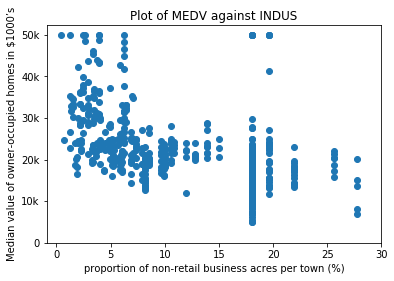

In [9]:
plt.clf()   # Clear figure
plt.scatter(housing_raw['INDUS'], housing_raw['MEDV'])
plt.xlabel("proportion of non-retail business acres per town (%)")
plt.ylabel("Median value of owner-occupied homes in $1000’s")
plt.title('Plot of MEDV against INDUS')

# Definition of tick_val and tick_lab
xtick_val = [0,5,10,15,20,25,30]
ytick_val = [0,10,20,30,40,50]
ytick_lab = ['0','10k','20k','30k','40k','50k']

# Adapt the ticks on the axis
plt.xticks(xtick_val)
plt.yticks(ytick_val, ytick_lab)

plt.show()

### CHAS (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise))

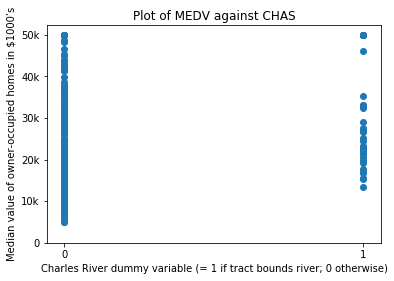

In [10]:
plt.clf()   # Clear figure
plt.scatter(housing_raw['CHAS'], housing_raw['MEDV'])
plt.xlabel("Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)")
plt.ylabel("Median value of owner-occupied homes in $1000’s")
plt.title('Plot of MEDV against CHAS')

# Definition of tick_val and tick_lab
xtick_val = [0,1]
ytick_val = [0,10,20,30,40,50]
ytick_lab = ['0','10k','20k','30k','40k','50k']

# Adapt the ticks on the axis
plt.xticks(xtick_val)
plt.yticks(ytick_val, ytick_lab)

plt.show()

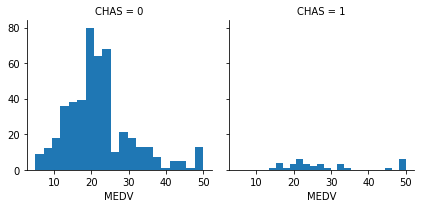

In [11]:
g = sns.FacetGrid(housing_raw, col='CHAS')
g.map(plt.hist, 'MEDV', bins=20)

### NOX (nitric oxides concentration (parts per 10 million))

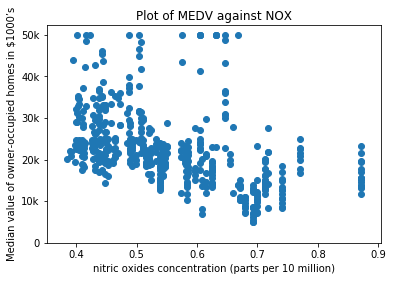

In [12]:
plt.clf()   # Clear figure
plt.scatter(housing_raw['NOX'], housing_raw['MEDV'])
plt.xlabel("nitric oxides concentration (parts per 10 million)")
plt.ylabel("Median value of owner-occupied homes in $1000’s")
plt.title('Plot of MEDV against NOX')

# Definition of tick_val and tick_lab
xtick_val = [0.4,0.5,0.6,0.7,0.8,0.9]
ytick_val = [0,10,20,30,40,50]
ytick_lab = ['0','10k','20k','30k','40k','50k']

# Adapt the ticks on the axis
plt.xticks(xtick_val)
plt.yticks(ytick_val, ytick_lab)

plt.show()

### RM (average number of rooms per dwelling)

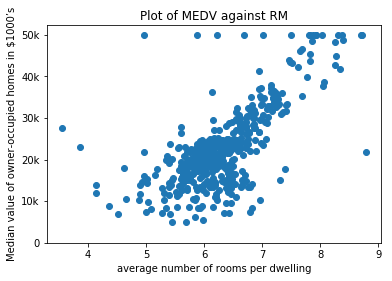

In [13]:
plt.clf()   # Clear figure
plt.scatter(housing_raw['RM'], housing_raw['MEDV'])
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("Median value of owner-occupied homes in $1000’s")
plt.title('Plot of MEDV against RM')

# Definition of tick_val and tick_lab
ytick_val = [0,10,20,30,40,50]
ytick_lab = ['0','10k','20k','30k','40k','50k']

# Adapt the ticks on the axis
plt.yticks(ytick_val, ytick_lab)

plt.show()

### AGE (proportion of owner-occupied units built prior to 1940)

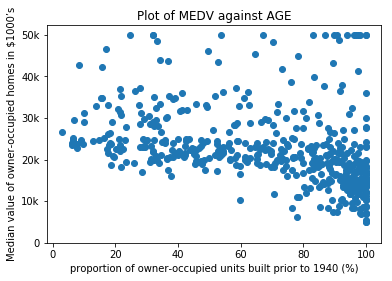

In [14]:
plt.clf()   # Clear figure
plt.scatter(housing_raw['AGE'], housing_raw['MEDV'])
plt.xlabel("proportion of owner-occupied units built prior to 1940 (%)")
plt.ylabel("Median value of owner-occupied homes in $1000’s")
plt.title('Plot of MEDV against AGE')

# Definition of tick_val and tick_lab
ytick_val = [0,10,20,30,40,50]
ytick_lab = ['0','10k','20k','30k','40k','50k']

# Adapt the ticks on the axis
plt.yticks(ytick_val, ytick_lab)

plt.show()

### DIS (weighted distances to five Boston employment centres)

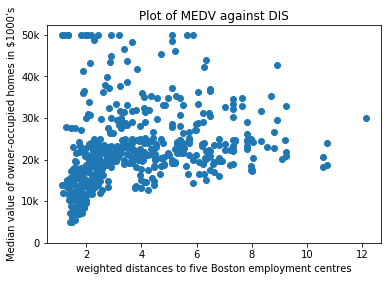

In [15]:
plt.clf()   # Clear figure
plt.scatter(housing_raw['DIS'], housing_raw['MEDV'])
plt.xlabel("weighted distances to five Boston employment centres")
plt.ylabel("Median value of owner-occupied homes in $1000’s")
plt.title('Plot of MEDV against DIS')

# Definition of tick_val and tick_lab
ytick_val = [0,10,20,30,40,50]
ytick_lab = ['0','10k','20k','30k','40k','50k']

# Adapt the ticks on the axis
plt.yticks(ytick_val, ytick_lab)

plt.show()

### RAD (index of accessibility to radial highways)

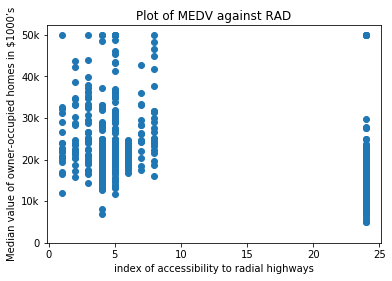

In [16]:
plt.clf()   # Clear figure
plt.scatter(housing_raw['RAD'], housing_raw['MEDV'])
plt.xlabel("index of accessibility to radial highways")
plt.ylabel("Median value of owner-occupied homes in $1000’s")
plt.title('Plot of MEDV against RAD')

# Definition of tick_val and tick_lab
ytick_val = [0,10,20,30,40,50]
ytick_lab = ['0','10k','20k','30k','40k','50k']

# Adapt the ticks on the axis
plt.yticks(ytick_val, ytick_lab)

plt.show()

### TAX (full-value property-tax rate per $10,000)

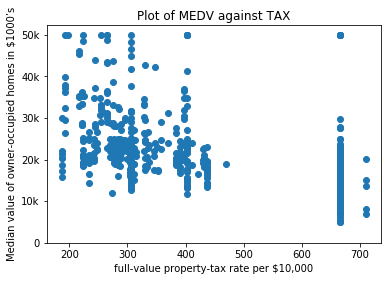

In [17]:
plt.clf()   # Clear figure
plt.scatter(housing_raw['TAX'], housing_raw['MEDV'])
plt.xlabel("full-value property-tax rate per $10,000")
plt.ylabel("Median value of owner-occupied homes in $1000’s")
plt.title('Plot of MEDV against TAX')

# Definition of tick_val and tick_lab
ytick_val = [0,10,20,30,40,50]
ytick_lab = ['0','10k','20k','30k','40k','50k']

# Adapt the ticks on the axis
plt.yticks(ytick_val, ytick_lab)

plt.show()

### PTRATIO (pupil-teacher ratio by town)

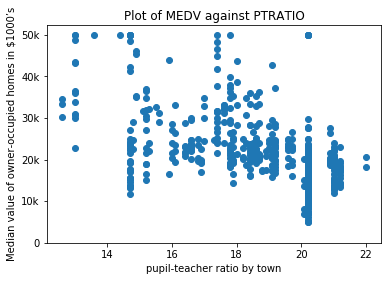

In [18]:
plt.clf()   # Clear figure
plt.scatter(housing_raw['PTRATIO'], housing_raw['MEDV'])
plt.xlabel("pupil-teacher ratio by town")
plt.ylabel("Median value of owner-occupied homes in $1000’s")
plt.title('Plot of MEDV against PTRATIO')

# Definition of tick_val and tick_lab
ytick_val = [0,10,20,30,40,50]
ytick_lab = ['0','10k','20k','30k','40k','50k']

# Adapt the ticks on the axis
plt.yticks(ytick_val, ytick_lab)

plt.show()

### B (1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town)

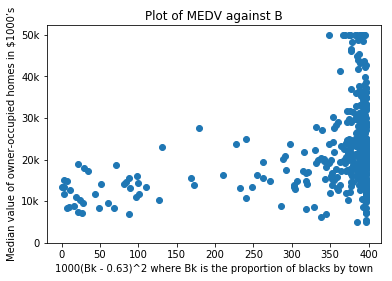

In [19]:
plt.clf()   # Clear figure
plt.scatter(housing_raw['B'], housing_raw['MEDV'])
plt.xlabel("1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town")
plt.ylabel("Median value of owner-occupied homes in $1000’s")
plt.title('Plot of MEDV against B')

# Definition of tick_val and tick_lab
ytick_val = [0,10,20,30,40,50]
ytick_lab = ['0','10k','20k','30k','40k','50k']

# Adapt the ticks on the axis
plt.yticks(ytick_val, ytick_lab)

plt.show()

### LSTAT (% lower status of the population)

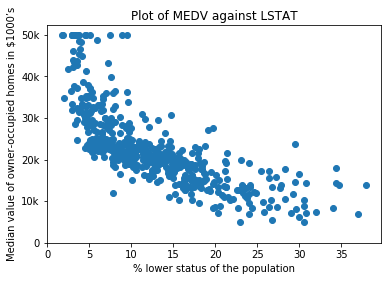

In [20]:
plt.clf()   # Clear figure
plt.scatter(housing_raw['LSTAT'], housing_raw['MEDV'])
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000’s")
plt.title('Plot of MEDV against LSTAT')

# Definition of tick_val and tick_lab
ytick_val = [0,10,20,30,40,50]
ytick_lab = ['0','10k','20k','30k','40k','50k']

# Adapt the ticks on the axis
plt.yticks(ytick_val, ytick_lab)

plt.show()

_(Provide your verbal answer here)_

From the scatter plots of all the variables, it appears LSTAT is likely the single variable that is most predictive of the target. There is a clear observable trend. There is also minimal spread of of points along each vertical axis, meaning each value of LSTAT does not have data points that span over the entire range of the target value ($0 to $50K). So with each value of the LSTAT you can predict a narrower range of the expected MEDV than from using other variables. There is also minimal anomalous data points along each value of LSTAT that can influence the prediction erroneously.

__Create a linear regression model, and try to predict the price based on the parameter you chose:__

In [21]:
X_housing_single = housing_raw[["LSTAT"]]
Y_housing = housing_raw[["MEDV"]]

In [22]:
X_housing_single_train, X_housing_single_cv, Y_housing_train, Y_housing_cv = train_test_split(X_housing_single, 
                                                    Y_housing,
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=0)

In [23]:
reg1 = LinearRegression().fit(X_housing_single_train, Y_housing_train)
reg1.score(X_housing_single_cv, Y_housing_cv)

0.5218049526125568

__Extract the coefficients or weights of the linear model interpret what they mean.__ <br> Make sure you visualise the linear regression line and comment on how the line fits the data.

In [24]:
reg1.coef_

array([[-0.96814078]])

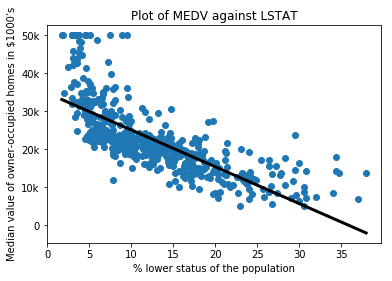

In [25]:
prediction_space = np.linspace(min(housing_raw['LSTAT']), max(housing_raw['LSTAT'])).reshape(-1,1)
y_pred_plot = reg1.predict(prediction_space)

plt.clf()   # Clear figure
plt.scatter(housing_raw['LSTAT'], housing_raw['MEDV'])
plt.plot(prediction_space, y_pred_plot, color='black', linewidth=3)

plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000’s")
plt.title('Plot of MEDV against LSTAT')

# Definition of tick_val and tick_lab
ytick_val = [0,10,20,30,40,50]
ytick_lab = ['0','10k','20k','30k','40k','50k']

# Adapt the ticks on the axis
plt.yticks(ytick_val, ytick_lab)

plt.show()

_(Provide your verbal answer here)_

The data forms a wide band around the linear regression line. While the line appears to follow the general trend of the data, it does not follow the slight curvature of the data points. In addition, many of the data points are quite far from the line. Hence each prediction from the model will have a wide error range. Which is why the prediction score is low.

Linear regression is considered a simple model, using a polynomial model introduces a higher complexity. <br>
__Find and implement two more models (with medium and high complexity) to predict the target variable, using the same variable you chose for the previous part__ (Be sure to visualize your result and comment about the fit).

Fit and plot your medium complexity model here:

In [26]:
poly = PolynomialFeatures(degree=3)
X_housing_single_train_3 = poly.fit_transform(X_housing_single_train)
X_housing_single_cv_3 = poly.fit_transform(X_housing_single_cv)
reg3 = LinearRegression().fit(X_housing_single_train_3, Y_housing_train)
reg3.score(X_housing_single_cv_3, Y_housing_cv)

0.6145861618613051

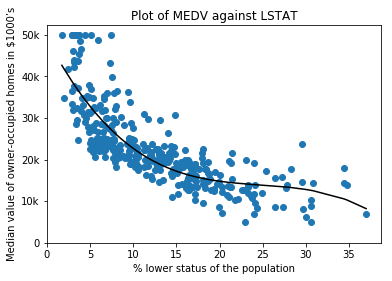

In [27]:
plt.clf()   # Clear figure

# Sorting the x records for plotting of curve
X_housing_single_train_sorted = X_housing_single_train.sort_values('LSTAT')
X_housing_single_train_sorted_3 = poly.fit_transform(X_housing_single_train_sorted)

plt.scatter(X_housing_single_train, Y_housing_train)
plt.plot(X_housing_single_train_sorted, reg3.predict(X_housing_single_train_sorted_3), color='k')

plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000’s")
plt.title('Plot of MEDV against LSTAT')

# Definition of tick_val and tick_lab
ytick_val = [0,10,20,30,40,50]
ytick_lab = ['0','10k','20k','30k','40k','50k']

# Adapt the ticks on the axis
plt.yticks(ytick_val, ytick_lab)

plt.show()

Fit and plot your high complexity model here:

In [28]:
poly = PolynomialFeatures(degree=5)
X_housing_single_train_5 = poly.fit_transform(X_housing_single_train)
X_housing_single_cv_5 = poly.fit_transform(X_housing_single_cv)
reg5 = LinearRegression().fit(X_housing_single_train_5, Y_housing_train)
reg5.score(X_housing_single_cv_5, Y_housing_cv)

0.6415440639029076

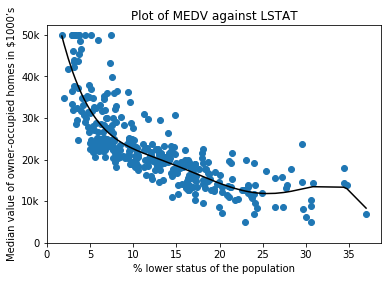

In [29]:
plt.clf()   # Clear figure

# Sorting the x records for plotting of curve
X_housing_single_train_sorted = X_housing_single_train.sort_values('LSTAT')
X_housing_single_train_sorted_5 = poly.fit_transform(X_housing_single_train_sorted)

plt.scatter(X_housing_single_train, Y_housing_train)
plt.plot(X_housing_single_train_sorted, reg5.predict(X_housing_single_train_sorted_5), color='k')

plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000’s")
plt.title('Plot of MEDV against LSTAT')

# Definition of tick_val and tick_lab
ytick_val = [0,10,20,30,40,50]
ytick_lab = ['0','10k','20k','30k','40k','50k']

# Adapt the ticks on the axis
plt.yticks(ytick_val, ytick_lab)

plt.show()

Use the following section to answer: which of the models has the best fit and why?

_(Provide your answer here)_

The model with the highest complexity appears to have the best fit. Increasing the polynomial function increases the ability of the curve to fit closer to the data points by allowing for more bends along the line.

__Find a quantitative way of measuring the model fit__ <br>
Calculate it for each one of the models and compare the results to your visual inspection interpretation:

In [30]:
y_pred_1 = reg1.predict(X_housing_single_cv)
y_pred_3 = reg3.predict(X_housing_single_cv_3)
y_pred_5 = reg5.predict(X_housing_single_cv_5)
y_preds = [y_pred_1, y_pred_3, y_pred_5]
power = [1,3,5]
Y_rmse = []

for y_pred in y_preds:
    Y_rmse.append(np.sqrt(mean_squared_error(Y_housing_cv, y_pred)))
    
fit_measure = { 'Power':power, 'RMSE':Y_rmse}
df_fit_measure = pd.DataFrame(fit_measure)
df_fit_measure

,Power,RMSE
0,1,6.310083
1,3,5.664952
2,5,5.463242


If you did the exercise right, you should see the viaual and quantative fit increase in the same direction as the model complexity. 


##### But is fitness a good measure of a model?
In order to put this question to the test, __perform a cross-validation test for the three models and compare between them:__

In [31]:
# Cross-validation using degree 1 dataset
reg_cv_1 = LinearRegression()
cv_scores_1 = cross_val_score(reg_cv_1, X_housing_single, Y_housing, cv=5)

# Cross-validation using degree 3 dataset
poly3 = PolynomialFeatures(degree=3)
X_housing_single_3 = poly3.fit_transform(X_housing_single)
reg_cv_3 = LinearRegression()
cv_scores_3 = cross_val_score(reg_cv_3, X_housing_single_3, Y_housing, cv=5)

# Cross-validation using degree 3 dataset
poly5 = PolynomialFeatures(degree=5)
X_housing_single_5 = poly5.fit_transform(X_housing_single)
reg_cv_5 = LinearRegression()
cv_scores_5 = cross_val_score(reg_cv_5, X_housing_single_5, Y_housing, cv=5)

print(cv_scores_1)
print(cv_scores_3)
print(cv_scores_5)
print("Average R2 for model using degree 1 dataset: {}".format(np.mean(cv_scores_1)))
print("Average R2 for model using degree 3 dataset: {}".format(np.mean(cv_scores_3)))
print("Average R2 for model using degree 5 dataset: {}".format(np.mean(cv_scores_5)))

[0.31784807 0.5406078  0.07608699 0.42423767 0.1267687 ]
[0.43502316 0.73578317 0.33372492 0.49515335 0.29006058]
[0.5026087  0.7695249  0.32339874 0.53681747 0.37357483]
Average R2 for model using degree 1 dataset: 0.29710984600668633
Average R2 for model using degree 3 dataset: 0.45794903499035283
Average R2 for model using degree 5 dataset: 0.5011849275393513


In [32]:
X_housing_single_3.shape

(506, 4)

In [33]:
X_housing_single_5.shape

(506, 6)

What measure did you use to compare between the models and why? <br>
Which one fits the data the best? Explain that result

_(Provide your answer here)_

R^2 is used to compare between the models since the question here is about the fit. R^2 is a measure of how close the data are to the fitted regression line. So it is a good measure in this case.

In this case, the model with the highest polynomial feature fits the data the best. This is because only 1 variable is used and increasing its power allow for the model trained to be able to follow the data more closely. Which lead to a better R^2 score.

Let's try to extend this discussion by including all the remaining variables in the Boston dataset. <br> __Fit the three models, use _all_ the variables in the Boston dataset and compare their cross validation scores.__ <br> See if you observe the same patterns as when using one variable.

In [34]:
X = housing_raw.drop('MEDV', axis=1)
Y = housing_raw['MEDV']

# Cross-validation using degree 1 dataset
full_reg_cv_1 = LinearRegression()
full_cv_scores_1 = cross_val_score(full_reg_cv_1, X, Y, cv=5)

# Cross-validation using degree 3 dataset
poly3 = PolynomialFeatures(degree=3)
X_3 = poly3.fit_transform(X)
full_reg_cv_3 = LinearRegression()
full_cv_scores_3 = cross_val_score(full_reg_cv_3, X_3, Y, cv=5)

# Cross-validation using degree 3 dataset
poly5 = PolynomialFeatures(degree=5)
X_5 = poly5.fit_transform(X)
full_reg_cv_5 = LinearRegression()
full_cv_scores_5 = cross_val_score(full_reg_cv_5, X_5, Y, cv=5)

print(full_cv_scores_1)
print(full_cv_scores_3)
print(full_cv_scores_5)
print("Average R2 for model using degree 1 dataset: {}".format(np.mean(full_cv_scores_1)))
print("Average R2 for model using degree 3 dataset: {}".format(np.mean(full_cv_scores_3)))
print("Average R2 for model using degree 5 dataset: {}".format(np.mean(full_cv_scores_5)))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
[-1.26447920e+06 -1.39108468e+08 -1.41212468e+07 -1.18512682e+04
 -4.88509577e+05]
[-4.26266407e+02 -7.17053299e+03 -1.03537908e+03 -1.51718229e+03
 -8.42120311e+06]
Average R2 for model using degree 1 dataset: 0.3532759243958815
Average R2 for model using degree 3 dataset: -30998910.870210208
Average R2 for model using degree 5 dataset: -1686270.4946918234


In [35]:
X_3.shape

(506, 560)

In [36]:
X_5.shape

(506, 8568)

- For each model, explain the differences you encountered when expanding the dataset.<br>
- Compare the current result between models and try to explain it.

_(Provide your answer here)_

By increasing the number of variables used that are not dependent to each other this increases the complexity of the dataset. Further taking a polynomial on all the variables makes it even more complex. 

In the 1st model, the added features without adding their polynomial helps to improve the fit of the model. The new features in this case helps to provides more dimension for the model to learn that improves the prediction outcome.

However for the 2nd and 3rd model, the R^2 becomes negative with added features and their polynomial. For R^2 to behave normally, the assumption is that the model is more accurate at predicting than taking the mean of all the variables. Hence normally R^2 should give a value between 0 to 1. However, if the model is worse than taking the mean of all the variables, that is it is basically very bad at predicting, then it will result in a negative R^2. 

Because of the number of added variables, taking a power 3 and power 5 polynomial resulted in having more features than the number of records. There were too little data and training on a sub-set of this result in a model that is very overfitted and cannot generalise at all. In this case, the model is so bad that it is worse than a model that just takes the mean of all the features.

Ref about R Squared: http://www.fairlynerdy.com/what-is-r-squared/

Share your thoughts/conclusions regarding complexity in modeling:

_(Provide your answer here)_

Increasing the number of features by taking their polynomial might help in giving a better model. However be careful with the number of features you end up with. It is not true that the more features there are, the better the model will be. If there are too many features and too little data, this would likely lead to overfitting of the model. However if there are a lot of data but only very limited number of features, this might result in an under-fitted model and it would be worthwhile to consider adding more features.

__Expending our discussion on model complexity, comment below how one can decrease/increase complexity in the following families of algorithms:__ 
- Decision tree 
- Artificial neural network 
- Support vector machine
- K-nearest neighbour
- Bayesian method (optional)

_(Provide your answer here)_

#### Decision Tree
Specifying how pure each nodes is required to be, minimally how many samples have to be in each node and how deep the tree can be are some attributes that can affect the complexity of a decision tree. 

#### Artificial neural network
For neutral network, the number of features, number of layers and how many nodes/neurons in each layers will affect the complexity of the algorithm.

#### Support vector machine
For SVM, the types of kernel used affects the complexity of the algorithm. 

#### K-nearest neighbour
For K-nearest neighbour, the number of neighbours to take average for each point as well as how distance is treated affects the complexity of the algorithm.

#### Bayesian method
For Bayesian, the type of probability function selected affects the complexity of the algorithm.

__Provide the best explanation/definition (using your own words) of over/under-fitting:__

_(Provide your answer here)_

Over-fitting is when your model fits your training data very well. The model can predict the target accurately given the training data's features. However, the model does not generalise. Given data that the model has not seen, it might predict it poorly.

Under-fitting is when your model does not even fit your training data well. Feeding the training data back into the model that it has trained does not even give good prediction. New data gets predicted poorly by the model as well.

# 2. Bias Variance Trade-Off

One might claim machine learning is about balancing. If that's the case, what measure can we use to find the right balance? 

From a more theoretical perspective, two useful measures are bias and variance.<br>
In an intuitive sense, __bias__ is how off-the-mark our prediction/estimate tends to be with respect to the true value we are trying to predict. Usually we get bias because of inherent limitation in the model/algorithm we choose, for example linear regression is limited only to fit linear patterns, and hence "biased" towards linearity. <br>
__Variance__ is how flexible the predictions made by the model can be to fit more complicated patterns in data. Highly complex models tend to have high variance. This comes as a cost; as flexibility increases, the sensitivity of the models to the training data that they try to fit increases, resulting in the predictions being more distributed away from the true values. 

__This is just the tip of the iceberg, we encourage you to pause your work on the notebook for now and seek more information about the relationship to get a better understanding before we dive in.__

Bias and variance is a trade-off, increasing one decreases the other.<br> __Provide an explanation to why this is so:__


_(Provide your answer here)_

This is related to the model complexity. As complexity increases, bias usually decreases. But as complexity increases, variance would also increase.

__Provide mathematical formulas for the bias, the variance and the overall prediction error of a model:__

Bias = E[f^(x)]−f(x)
<br>
<br>
Variance = E[(f^(x)−E[f^(x)])<sup>2</sup>]
<br>
<br>
Overall prediction error = Bias<sup>2</sup> + Variance + Irreducible Error
<br>
Err(x) = (E[f^(x)]−f(x))<sup>2</sup> + E[(f^(x)−E[f^(x)])<sup>2</sup>] + σ<sup>2</sup>

Shifting our focus to a more practical approach, we will now try and demonstrate how to find the right balance between bias variance when fitting a model. 

__Define a high order polynomial curve to fit:__ <br>
(One example is: $f(x)=0.2x^{5}-3.5x^{4}+21x^{3}-53x^{2}+37x+0.6$ (you are free to define another function)

In [37]:
def f(x):
    return 0.2*x**5 - 3.5*x**4 + 21*x**3 - 53*x**2 + 37*x + 0.6

Plot the function you created:

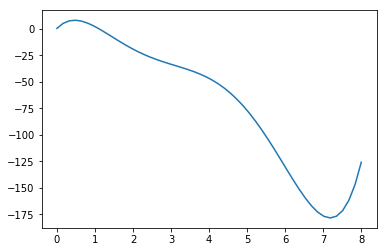

In [38]:
x = np.linspace(0,8,50)
plt.plot(x, f(x))
plt.show()

Our goal is to estimate this function using polynomial regression. In real-life cases, the true function is not accessible to us, only noisy estimates around it.

__Now, simulate a training data by introducing random errors on the curve.__<br>The training data should look like the figure below (make sure you have at least a 1000 observations).

<img src="./training_data.png">

In [39]:
def random_floats(low, high, size):
    return [np.random.uniform(low, high) for _ in range(size)]

def noise():
    mu0 = 0
    sigma0 = 4
    return st.norm.rvs(mu0, sigma0, size = 1)

# Sets a list of random floats
# ran_x = random_floats(0, 8, 1000)
ran_x = np.linspace(0,8,1000)

# Convert list of x to numpy array
np_ran_x = np.array(ran_x)

# Generate numpy array of y START
np_ran_y_without_noise = f(np_ran_x)

noise_list = []
for i in range(1000):
    noise_list.append(noise())
np_noise_list = np.array(noise_list)
np_ran_y = np_ran_y_without_noise.reshape(-1,1) + np_noise_list
# Generate numpy array of y END

dataset = pd.DataFrame({'Random_X':np_ran_x.reshape(-1,1).flatten(),'Random_Y':np_ran_y.flatten()})

dataset.head()

,Random_X,Random_Y
0,0.000000,2.143123
1,0.008008,1.918239
2,0.016016,-0.075884
3,0.024024,4.254189
4,0.032032,3.291558


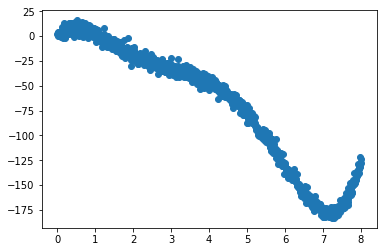

In [40]:
plt.clf
plt.scatter(dataset['Random_X'], dataset['Random_Y'])
plt.show()

In [41]:
# Saving generated dataset to csv file
# dataset[['Random_X', 'Random_Y']].to_csv('data/bias_variance.csv', index=False)

Spare a few hundreds samples to use as the validation set (and plot it):

In [42]:
bv_raw = pd.read_csv('data/bias_variance.csv')

X_bv = bv_raw["Random_X"]
y_bv = bv_raw["Random_Y"]

X_bv_train, X_bv_test, y_bv_train, y_bv_test = train_test_split(X_bv, 
                                                    y_bv,
                                                    train_size=0.8, 
                                                    test_size=0.2, 
                                                    random_state=0)

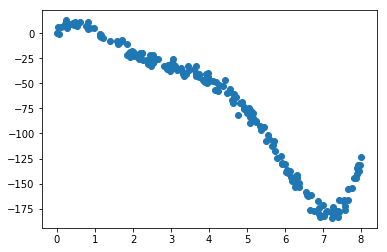

In [43]:
plt.clf
plt.scatter(X_bv_test, y_bv_test)
plt.show()

Using the remaining data, build 500 linear regression models, each by randomly sampling 80 observations from the pool:

In [44]:
reg_models = []

for i in range(500):
    X_bulk, X_sample, y_bulk, y_sample = train_test_split(X_bv_train, 
                                                        y_bv_train,
                                                        train_size=0.9, 
                                                        test_size=0.1)
    reg = LinearRegression()
    reg.fit(X_sample.to_frame(), y_sample)
    reg_models.append(reg)

print(len(reg_models))

500


__Calculate the bias square and variance of linear regression by predicting (using the 500 models) the values of the validation set above, and comparing them against the true values from the polynomial curve defined earlier.__ <br> (refer to the bias variance formula to do the calculation)

In [45]:
def truth():
    count = 1000
    num = np.linspace(0,8,count)
    total = 0
    for i in num:
        total = total + f(i)
    return total / count

def get_bias_square(y_df):
    return (np.mean(y_df) - truth())**2

def get_variance(y_df):
    return np.mean((y_df - np.mean(y_df))**2)

bias_squared_list = []
variance_list = []
for x in reg_models:
    pred = x.predict(X_bv_test.to_frame())
    bias_squared_list.append(get_bias_square(pred))
    variance_list.append(get_variance(pred))
    
np_bias_squared = np.array(bias_squared_list)
np_variance = np.array(variance_list)
bias_variance_df = pd.DataFrame({'Bias_Squared':np_bias_squared.flatten(),'Variance':np_variance.flatten()})

bias_variance_df

,Bias_Squared,Variance
0,25.018339,3227.934189
1,0.047572,3087.857626
2,30.680731,3384.561158
3,35.860523,3513.732157
4,9.834641,3026.164204
5,12.054585,3512.407616
6,12.159950,3246.917521
7,23.317189,3159.380068
8,34.872795,3753.735888
9,10.340213,3215.905141


Repeat the whole procedure of calculating bias variance, but this time using polynomial of degrees 2, 3, 4, ..., 15

In [46]:
def get_poly_data(X_data, deg):
    poly = PolynomialFeatures(degree=deg)
    X_data_poly = poly.fit_transform(X_data)
    
    return X_data_poly

def train_500_models(X_bv_train, y_bv_train):
    reg_models = []

    for i in range(500):
        X_bulk, X_sample, y_bulk, y_sample = train_test_split(X_bv_train, 
                                                            y_bv_train,
                                                            train_size=0.9, 
                                                            test_size=0.1)
        reg = LinearRegression()
        reg.fit(X_sample, y_sample)
        reg_models.append(reg)
    
    return reg_models

def get_bias_variance_df(reg_models, X_bv_test, y_bv_test):
    bias_squared_list = []
    variance_list = []
    mse_list = []
    for x in reg_models:
        pred = x.predict(X_bv_test)
        bias_squared_list.append(get_bias_square(pred))
        variance_list.append(get_variance(pred))
        mse_list.append(mean_squared_error(y_bv_test, pred))
    
    np_bias_squared = np.array(bias_squared_list)
    np_variance = np.array(variance_list)
    np_mse = np.array(mse_list)
    bias_variance_df = pd.DataFrame({'Bias_Squared':np_bias_squared.flatten(),'Variance':np_variance.flatten(),'MSE':np_mse.flatten()})
    
    return bias_variance_df

def get_mean_bias_variance_by_power(X_bv_train, X_bv_test, y_bv_train, y_bv_test, deg):
    X_bv_train_2 = get_poly_data(X_bv_train.values.reshape(-1, 1), deg)
    reg_models_2 = train_500_models(X_bv_train_2, y_bv_train)
    X_bv_test_2 = get_poly_data(X_bv_test.values.reshape(-1, 1), deg)
    bias_variance_df_2 = get_bias_variance_df(reg_models_2, X_bv_test_2, y_bv_test)

    return bias_variance_df_2


# START OF CALCULATING OF BIAS & VARIANCE OF DIFFERENT POWER
degree_list = np.arange(2,15)
bias_list = []
variance_list = []
mse_list = []

for deg in degree_list:
    bias_variance_df = get_mean_bias_variance_by_power(X_bv_train, X_bv_test, y_bv_train, y_bv_test, deg)
    bias_list.append(bias_variance_df["Bias_Squared"].mean())
    variance_list.append(bias_variance_df["Variance"].mean())
    mse_list.append(bias_variance_df["MSE"].mean())
    
print(bias_list)
print(variance_list)
print(mse_list)

[26.215735054558117, 22.396136986592264, 13.930826467325144, 14.847079994737152, 15.139687816066282, 14.891759583003537, 14.93188695009931, 14.759015245024544, 14.76255666337472, 16.254359813784067, 15.94439676873047, 23.50680019676476, 20.177735401363226]
[3786.180548883655, 3787.1856024535828, 3849.875743203692, 3678.5768498897396, 3677.5378556752885, 3680.2825450748637, 3682.299831841785, 3682.021499777464, 3691.2431018601255, 3709.381288423629, 3735.5651586977574, 3883.7227048750547, 3830.275021978925]
[294.8829382583882, 247.46002936001133, 102.72166359825472, 17.69496778522611, 18.01350595575215, 18.76879506345089, 20.332306218707494, 22.821154096153204, 26.432987586026687, 42.34463772884396, 59.76374029693963, 259.0912247564861, 190.75159195379143]


Plot the bias and variance (as y) vs. the model complexity/polynomial degree (as x)

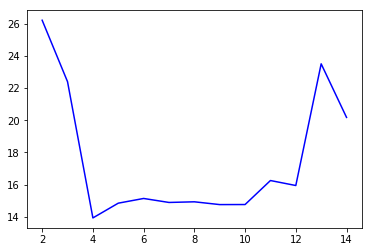

In [67]:
plt.clf
plt.plot(degree_list, bias_list, color='b')
# plt.plot(degree_list, variance_list, color='g')
plt.show()

Where is the optimal balance point? Which polynomial degree is that? <br>
Find out more and elaborate on the meaning and importance that point of balance.

_(Provide your answer here)_

# The Practical Side 

Bias-variance trade-off is one of the most critical components of model tuning. You will need to find the right point in terms of model complexity to derive the best results for your model.

In practice, however, it is impossible to calculate bias and variance for an actual dataset. Try to explain why this is impossible below:

_(Provide your answer here)_

It is impossible to find the true bias of any dataset, because you don't know what is the ideal function that the dataset is trying to describe. We can only try to model a function that fits closely to the dataset and hopefully that model follows the truth close enough. If you know the function, then there isn't a need to build and train a model to begin with.

As for variance you can get the variance of the training data that you have. However, we would not know how accurate the data is a representation of the real world population. The variance that we get might not be very close to the truth.

Repeat the procedure you used to calculate bias-variance above, but this time calculate mean squared error instead. <br> Overlay the MSE on the bias variance plot earlier and comment on the observation.

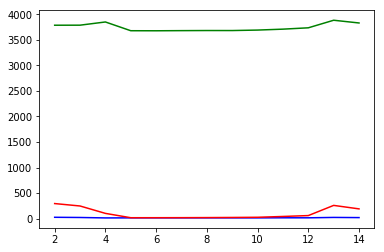

In [48]:
plt.clf
plt.plot(degree_list, bias_list, color='b')
plt.plot(degree_list, variance_list, color='g')
plt.plot(degree_list, mse_list, color='r')
plt.show()

_(Provide your answer here)_

# 3. Out-of-sample Validation

Hence, we will go back to using mean squared errors (MSE) to tune our models. In reality, validation error is the most reliable source of information you can get, provided you do validation properly. You might have realised that MSE scores are negative when you put them through the `cross_val_score` method - do think about why this is so as well.

If you would like to do any data exploration, you can do them here.

In [49]:
bv_train = pd.concat([X_bv_train, y_bv_train], axis=1)
bv_train.describe()

,Random_X,Random_Y
count,800.000000,800.000000
mean,3.949740,-67.886247
std,2.323663,62.455958
min,0.000000,-185.255226
25%,1.851852,-126.027762
50%,3.967968,-46.936618
75%,5.951952,-16.103210
max,7.991992,17.763606


We will begin by building simple baseline models for our dataset. We will start with 3 baseline models: linear regression, k-nearest neighbours and decision trees. Build a simple regression model for each of them. Evaluate and report their performance, and identify the best model by preliminary performance.

## 3.1 Linear Regression

In [50]:
reg = LinearRegression()
reg.fit(X_bv_train.to_frame(), y_bv_train)
reg_pred = reg.predict(X_bv_test.to_frame())
mean_squared_error(y_bv_test, reg_pred)

341.8264813819628

## 3.2 K-Nearest Neighbours

In [51]:
neighbour = KNeighborsRegressor()
neighbour.fit(X_bv_train.to_frame(), y_bv_train)
neighbour_pred = neighbour.predict(X_bv_test.to_frame())
mean_squared_error(y_bv_test, neighbour_pred)

19.90224344498778

## 3.3 Decision Tree

In [52]:
tree = DecisionTreeRegressor()
tree.fit(X_bv_train.to_frame(), y_bv_train)
tree_pred = tree.predict(X_bv_test.to_frame())
mean_squared_error(y_bv_test, tree_pred)

31.962970745754383

## Theoretical Considerations

How do we ensure that our models are reliably evaluated? Specifically, in the area of out-of-sample validation, how do we decide to use `train_test_split` vs `cross_val_score`?

To ensure our models are reliably evaluted, we should implement cross validation and tune the model based on it. In this way, we can reduce the amount of overfitting since cross validation allows us to check our model that was trained using in-sample data by the out-of-sample data. However using cross validation to tune the model is in a way still training the model on a set of in-sample data. Ideally we should have a hold-out set to validate on our finalised model to see how it will perform on a totally unseen dataset.

For implementing the above strategy, we can use the train_test_split to create the hold-out set for the final evaluation of our model. cross_val_score will be used for tuning of our model.

Given that the dataset has only ~500 rows of data, what are the challenges we face, and how can we best mitigate these issues?

Given a relatively small dataset, we risk overfitting our model to our data. One way is to implement multi-fold cross validation to reduce the overfitting issue. We should also carry out hyperparameter tuning. We should evaluate how our model perform over different hyperparameter for the training set versus the test set. In this way, we can see if the model is overfitted to the training data and pick the best hyperparameter that does not overfit.

# 4. Hyperparameter exploration

We will now start to look at hyperparameters for these models. Considering between the 3 models, k-nearest neighbours probably has the least hyperparameters to tune, and is also the simplest computationally. Hence, let's start with k-nearest neighbours. You might not want to try all of these parameters, considering limited time. This is a good time to do some research with respect to what parameters to optimise.

When conducting a parameter search, the idea of grid search immediately comes to mind. Why do we usually use grid search, and in what situations should we use other search options?

Grid search allow us to easily sample over a range of all the parameters that we are interested in for tuning our model. We will be able to find the optimal set of parameters for our model that improves the score and reduces overfitting. 

However if the paramter set is large and your dataset is huge, it would be very resource intensive to run the full grid search. An alternative is RandomizedSearchCV. It searches randomly over the range of parameters that you specify. It is not as exhaustive as the grid search but it is less resource intensive if resource is an issue.

One possible approach is to use randomized search first to get a rough ideal set of parameters. Then do a grid search in the area of the initial set that randomized search suggest. But one risk is that you might get stuck in a local optimum.

Why do we not use gradient descent to identify the right parameters?

The parameter search is not a convex problem. There are many local optimum, so gradient descent might frequently get stuck in a local optimum even if you do random starts. 

In [58]:
X_selection_train, X_selection_test, y_selection_train, y_selection_test = train_test_split(X_selection_2, 
                                                    y_selection,
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=0)

In [59]:
X_selection_train.shape

(354, 105)

## 4.1 KNN

In [53]:
neighbour.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [69]:
param_grid = {'n_neighbors': np.arange(1,5), 'n_jobs':np.arange(1,5), 'algorithm':['ball_tree','kd_tree'], 'weights':['uniform','distance']}
neighbour_cv = GridSearchCV(neighbour, param_grid, cv=5)

neighbour_cv.fit(X_selection_train, y_selection_train)

print("Tuned K Nearest Neighbours Parameters: {}".format(neighbour_cv.best_params_)) 
print("Best score is {}".format(neighbour_cv.best_score_))

Tuned K Nearest Neighbours Parameters: {'algorithm': 'ball_tree', 'n_jobs': 1, 'n_neighbors': 4, 'weights': 'distance'}
Best score is 0.4311304388729744


Apart from the `n_neighbors` and `n_jobs` parameters, pick out 1-2 more which you are unfamiliar with and do some research. Explain what they do with language intended for a lay person. You may also wish to spend some time thinking about how you might want to implement such a model algorithmically.

#### n_neighbours
This is for specifying the numbers of nearest data point to be used to take a vote for each point of interest.

#### n_jobs
This is for specifying the number of parallel jobs to run. It does not affect the score of our model. It affects how fast the model will run.

#### algorithm
Type of algorithm used to search for the nearest neighbours in the entire dataset. It shouldn't affect the score of the model. It affects how fast the model will run as well.

#### weights
This is to specify how distances between data points are treated. Whether to treat all distance equally or to take a weighted distance approach, where the closest data points will carry more weights.

## 4.2 Decision Trees

Now we can proceed to a more complicated model, try to tune the hyperparameter of a decision tree regressor.

In [55]:
tree.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [70]:
tree_param_grid = {'max_depth': np.arange(1,10), 'min_samples_leaf':np.arange(1,10), 'min_samples_split':np.arange(2,10)}
tree_cv = GridSearchCV(tree, tree_param_grid, cv=5)

tree_cv.fit(X_selection_train, y_selection_train)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 9}
Best score is 0.8093883619811875


The linear model also requires tuning, but the current API we are using (linear_model.LinearRegression) is relatively weak and lacks the parameters we are looking for. Instead, we will work with elastic nets, and go beyond linear model complexity to build a better linear regression model. We will look at this in detail in the next session.

# 5. Feature Selection

We will begin by taking the model beyond linearity. In statistical languages more tuned towards modelling like R, we introduce polynomial features/covariates through a parameter within the model, as such:  

`lr = lm(y ~ poly(X, 3))`  

However, in the context of sklearn, the `LinearRegression` class solely focuses on optimising a set of regression coefficients for you, and does not look at coefficients. We will need to use modules from `sklearn.preprocessing` to help us develop polynomial features.

To start off, develop sets of polynomials features to different degrees. It is up to you to decide what power to raise for the features, but keep it mind that high numbers put additional strain on your machine at an exponential rate, so be mindful of what your machine is capable of.

In [57]:
X_selection = housing_raw.drop('MEDV', axis=1)
y_selection = housing_raw['MEDV']
X_selection_2 = get_poly_data(X_selection, 2)

## 5.1 RFE Feature Selection

One way of working with a large quantity of features is by using the Recursive Feature Elimination (RFE) algorithm. The name may provide us with a hint of what it does, but do explain ,with the language for a layperson, what RFE is doing and how it is executed algorithmically. Then, run the code to execute the model.

In [60]:
rfe_reg = LinearRegression()
rfe = RFE(estimator=rfe_reg, n_features_to_select=30, step=1)
rfe.fit(X_selection_train, y_selection_train)
rfe.score(X_selection_test, y_selection_test)

0.7180927675205194

Fit a linear regression on the model. How can we go beyond the final variables remaining in RFE to further improve the performance of the model?

1) The number of features to select can be tuned to control how many variables that RFE choose at the end.
2) Cross validation should also be done for choosing the number of features to prevent overfitting to the training data.

Consider the drawbacks of RFE, and explain them below:

RFE is very resource intensive. It runs iteratively and a lot of models are created. It removes a number of worse performing features in each run. As the number of features increases, it will become not feasible to run RFE anymore. 

## 5.2 Regularisation

Another method to reduce model complexity is through regularisation. Regularisation is the idea of penalising large weights as part of the model fitting process, and forcing the model to trade-off between large weights and model accuracy.

In your own words, explain why forcing the model to not adapt large weights can somehow help with feature selection and model fitting in general. How does the algorithm help the model to learn to recognise the best set of weights with a regularisation term?

In regression models, each of the variables are given a weights as a coefficient. The model is minimised with the weights varied to reach a model with least error. Without a regularisation term, some variables might be given high weights and those variables would dominate the model. This might result in overfitting of the model to those variables. To prevent this, a regularisation term should be used. Each of the weights is multipled by this regularisation term and the model is then minimised with the consideration of this regularisation term. If a certain variable have a large weight, this would give a large total error to the model because the regularisation term is penalising the large weight. Hence to minimise the model, the model would have to try to lower the weight for the variable. This prevents overfitting of the model to certain variables.

Build a L1 regression model through feature selection by regularisation. Tune your model to achieve optimal results.

In [61]:
lasso = Lasso()

lasso_param_grid = {'alpha': [1,3,10], 'normalize':[True, False], 'max_iter':[100000,1000000,10000000]}
lasso_cv = GridSearchCV(lasso, lasso_param_grid, cv=5)

lasso_cv.fit(X_selection_train, y_selection_train)

print("Tuned Lasso Parameters: {}".format(lasso_cv.best_params_))
print("Best score is {}".format(lasso_cv.best_score_))

Tuned Lasso Parameters: {'alpha': 10, 'max_iter': 100000, 'normalize': False}
Best score is 0.8248438772556896


In [62]:
lasso_cv.score(X_selection_test, y_selection_test)

0.7467135073587887

Repeat this process for a elastic net model.

In [63]:
elastic = ElasticNet()

elastic_param_grid = {'alpha': [0.1,1], 'l1_ratio': np.linspace(0,1,3), 'max_iter':[1000,1000000]}
elastic_cv = GridSearchCV(elastic, elastic_param_grid, cv=5)

elastic_cv.fit(X_selection_train, y_selection_train)

print("Tuned Elastic Net Parameters: {}".format(elastic_cv.best_params_))
print("Best score is {}".format(elastic_cv.best_score_))

C:\Users\Raymond\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Raymond\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Raymond\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Raymond\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want t

Tuned Elastic Net Parameters: {'alpha': 1, 'l1_ratio': 0.5, 'max_iter': 1000000}
Best score is 0.826378096781149


In [65]:
elastic_cv.score(X_selection_test, y_selection_test)

0.7664562575950212

Consider the differences between each type of regression - in this case, which is a superior model to use?

Lasso considers only L1 regularisation whereas Elastic Net considers L1 and L2 as a ratio. When tuning the Elastic Net, both pure L1 and pure L2 are considered while doing the grid search. Hence Lasso becomes like a subset of Elastic Net when doing a grid search. So a tuned Elastic Net is likely better or at least perform equally well as a tuned Lasso. The down side is tuning an Elastic Net will be more resource intensive.

In addition, Lasso is sensitive to correlation between features and might select randomly 1 out of 2 correlated features while elastic net is likely to keep both and give a more stable model. 

For ease of use, build pipelines using `sklearn.pipeline` so that these models can be better consumed later for meta-model ensembling.

In [64]:
rfeSteps = [('rfe', RFE(estimator=LinearRegression(), n_features_to_select=30, step=1))]

rfePipeline = Pipeline(rfeSteps)

lassoSteps = [('lasso', ElasticNet(alpha=10,normalize=False,max_iter=100000))]

lassoPipeline = Pipeline(lassoSteps)

elasticSteps = [('elasticnet', ElasticNet())]

elasticPipeline = Pipeline(elasticSteps)

How do RFE and regularisation-based models compare? Think about the strengths and weaknesses of regularisation, as compared to RFE.

RFE iteratively remove features. The assumption is that the worse performing features during training does not or should not contribute to the model. However, if those features matter in the unseen dataset, this will result in a model that is not accurate. In regularisation, all the features are treated to have some contribution to the model ultimately. Weights are assigned and model minimised. Unimportant features will be given low weights or even 0. The model will vary the weights and drop off some features if need, so we do not have to make any assumptions on how many features to drop.

# 6. Ensemble methods

Ensembling is the process of combining prediction models to improve overall performence. In this section, we'll look at various ways this can be done to achieve better resultings.

## 6.1 Bagging

The term "bag" is the abbreviation for "bootstrap aggregation", in which we build a boostrap for a dataset, then train a model for each dataset we produce, after which we aggregate the score. If you are not yet familiar with any of these concepts, do some research and appreciate the process. We will not go into detail here as we already have done that last week.

Using your tuned Decision Tree model from a previous section as the base model, implement and tune a model with bagging technique. Compare this result with a random forest model built from scratch.

In [73]:
tree = DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=9)

baggingRegressor = BaggingRegressor(base_estimator=tree)

bagging_param_grid = {'n_estimators': np.arange(1,10), 'max_samples':[0.6,0.8,1.0], 'max_features':[0.6,0.8,1.0]}
bagging_cv = GridSearchCV(baggingRegressor, bagging_param_grid, cv=5)

bagging_cv.fit(X_selection_train, y_selection_train)

print("Tuned Bagging Regressor Parameters: {}".format(bagging_cv.best_params_))
print("Best score is {}".format(bagging_cv.best_score_))

Tuned Bagging Regressor Parameters: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 8}
Best score is 0.8522318013567997


In [74]:
bagging_cv.score(X_selection_test, y_selection_test)

0.7607302484242205

In [78]:
forest = RandomForestRegressor()

forest_param_grid = {'n_estimators': np.arange(1,10), 'max_depth':np.arange(5,10), 'min_samples_leaf':np.arange(1,5)}
forest_cv = GridSearchCV(forest, forest_param_grid, cv=5)

forest_cv.fit(X_selection_train, y_selection_train)

print("Tuned Bagging Regressor Parameters: {}".format(forest_cv.best_params_))
print("Best score is {}".format(forest_cv.best_score_))

Tuned Bagging Regressor Parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 9}
Best score is 0.8674942657451604


In [79]:
forest_cv.score(X_selection_test, y_selection_test)

0.8008550583659844

## 6.2 Boosting

Boosting, as explained earlier this week, uses an aggregation of weak learners to reduce the total variance. It operates on a single model sequentially. At each iteration, it tries to rectify the errors made in the previous iteration.

a) Explain the term "weak learner".  
b) Explain how adaptive boosting (AdaBoost) and gradient boosting (GBM) work and highlight their differences.

#### Answer to a) 
Weak learners are models that are slightly better than random guessing. There are observations that the weak learner have difficulty in guessing.

#### Answer to b)
AdaBoost works by building an initial model of decision stumps (single split trees). Those data points that are difficult to be predicted by the model are given more weights. Subsequent new weak learners will focus more on those data points that were predicted wrongly. This cycle repeats.

Gradient boosting is also made up of an aggregates of weak learners. The model is addictive in that weak learners are added 1 at a time and existing weak learners in the model are not changed. A gradient descent procedure is used to minimise the loss when adding trees. The new weak learner added will have its parameters selected that further reduces the loss of the model.

The different between the 2 is that, AdaBoost give weights to data points that are not predicted correctly in the previous run so that in subsequent run, more focus is given to those data points. However for gradient boosting, the goal is to minimise a loss function. New weak learners that are added will reduce the loss.

Perform AdaBoost and Gradient Boosting on Boston, and compare the accuracies. Comment on the performances as well.

In [85]:
ada = AdaBoostRegressor()

ada_param_grid = {'n_estimators': [30,50,70], 'learning_rate':[0.1,1.0,10.0]}
ada_cv = GridSearchCV(ada, ada_param_grid, cv=5)

ada_cv.fit(X_selection_train, y_selection_train)

print("Tuned Bagging Regressor Parameters: {}".format(ada_cv.best_params_))
print("Best score is {}".format(ada_cv.best_score_))

Tuned Bagging Regressor Parameters: {'learning_rate': 1.0, 'n_estimators': 30}
Best score is 0.8448561923732236


In [86]:
ada_cv.score(X_selection_test, y_selection_test)

0.727032413099004

In [87]:
gradBoost = GradientBoostingRegressor()

gradBoost_param_grid = {'n_estimators': [50,100,150], 'learning_rate':[0.01,0.1,1.0]}
gradBoost_cv = GridSearchCV(gradBoost, gradBoost_param_grid, cv=5)

gradBoost_cv.fit(X_selection_train, y_selection_train)

print("Tuned Bagging Regressor Parameters: {}".format(gradBoost_cv.best_params_))
print("Best score is {}".format(gradBoost_cv.best_score_))

Tuned Bagging Regressor Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best score is 0.8855408379069024


In [88]:
gradBoost_cv.score(X_selection_test, y_selection_test)

0.7757291221524532

Gradient boosting appears to perform better than adaboost. But there are more parameters that could be tuned for both models to improve their performance. However due to limited laptop capability, only a small subset of parameters and a limited range for them were used for tuning.

In practice, we use an XGBoost (eXtreme Gradient Boosting) model, which outperforms typical boosting models due to its ability to be parallelized AND having the appropriate tunable regularisation and tree parameters. Try reading up the documentation on `xgboost` and tune an `xgboost model`.

In [94]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear')

xg_reg_param_grid = {'n_estimators': [5,10,15], 'learning_rate':[0.01,0.1,1.0], 'alpha':[5,10,15], 'max_depth':[5,7], 'colsample_bytree':[0.2,0.3]}
xg_reg_cv = GridSearchCV(xg_reg, xg_reg_param_grid, cv=5)

xg_reg_cv.fit(X_selection_train, y_selection_train)

print("Tuned Bagging Regressor Parameters: {}".format(xg_reg_cv.best_params_))
print("Best score is {}".format(xg_reg_cv.best_score_))

Tuned Bagging Regressor Parameters: {'alpha': 5, 'colsample_bytree': 0.3, 'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 5}
Best score is 0.7526109796948981


In [95]:
xg_reg_cv.score(X_selection_test, y_selection_test)

0.746005661463616

## 6.3 Stacking

Finally, stacking helps us bring all the models we have done from all the past attempts into one big model. Before this, we have been evaluating models at an individual level. How can we best bring the performance of all these models together, into one even stronger model?

One such approach is stacking. Stacking is building a meta-level model that can take the results of each model, and combine them in an appropriate manner to create a even stronger model. Stacking-based meta-models have seen [success on modelling competitions](https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/) in recent years, due to availability of compute power to data scientists.

Build a linear regression meta model stacking on top of all the models you've built so far. Report on your accuracy - this is the final accuracy we are looking at.

ref for implementing stacking: https://machinelearningmastery.com/implementing-stacking-scratch-python/

We can observe that the minimum MSE corresponds to the point where the balance between bias and variance is met. MSE is accessible by us. This is the reason why cross-validation and outsample test methods used in Week 1 can be used not only for validation, but also for us to tune our model complexity. In the following sections, we will explore how we use them to guide model selection, hyperparameter tuning, regularisation and ensemble methods; all to get the best generalisation capability possible (i.e. the balancing act).

# Congratulations! 
### You have reached the end of our notebook :)
#### Now what?
If you still have time and you're considering what would be the best use of it, <br>
please continue and try your luck with the next (and optional) section of the notebook.<br>
Alternatively, if you have yet to completed the previous notebook, or if there are parts you wish to go back to and revisit/revise/tune or read up more about, feel free to do so...

<img src="./Fireworks.jpg">

# 7. Other directions (Optional)

1. Try and repeat the notebook's process, only this time use classification models/problem instead of regression.
2. Bias-variance is only one means of model profiling we looked into in this notebookt. Try to research and look into  other measures of model profiling, i.e. by vc dimension, induction bias, empirical risk minimisation.
